In [1]:
# https://huggingface.co/deepseek-ai/DeepSeek-V3


375/19647


0.019086883493663154

In [2]:
import random
 #1 represents a car
 #0 represent a goat

stay = 0  #amount won if stay in the same position
switch = 0 # amount won if you switch 

for i in range(1000):
    lst = [1,0,0]           # one car and two goats
    random.shuffle(lst)     # shuffles the list randomly    
    ran = random.randrange(3) # gets a random number for the random guess
    user = lst[ran] #storing the random guess 
    del(lst[ran]) # deleting the random guess

    huh = 0
    for i in lst: # getting a value 0 and deleting it
        if i ==0:
            del(lst[huh]) # deletes a goat when it finds it
            break
        huh+=1
        
    if user ==1: # if the original choice is 1 then stay adds 1
        stay+=1
        
    if lst[0] == 1: # if the switched value is 1 then switch adds 1
        switch+=1

print("Stay =",stay)
print("Switch = ",switch)


Stay = 340
Switch =  660


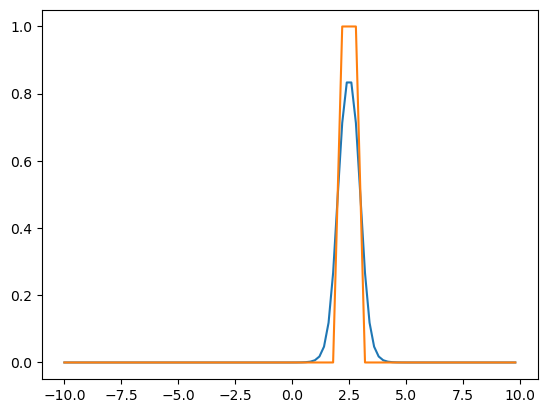

In [15]:

import math
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x, weight, bias):
    a = []
    for item in x:
        a.append(1 / (1 + math.exp(-weight * item + bias)))
    return a


x = np.arange(-10., 10., 0.2)
#sig = sigmoid(x, 1, 1)
#plt.plot(x, sig)
sig0 = sigmoid(x, 5, 2*5)
sig1 = sigmoid(x, 5, 3*5)
plt.plot(x, [sig0[i] - sig1[i] for i in range(len(sig0))])
sig0 = sigmoid(x, 50, 2*50)
sig1 = sigmoid(x, 50, 3*50)
plt.plot(x, [sig0[i] - sig1[i] for i in range(len(sig0))])
plt.show()


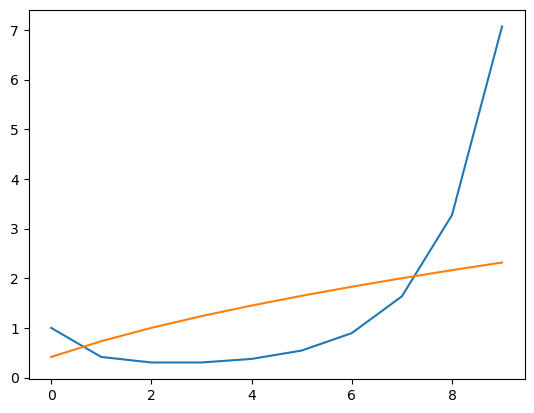

In [29]:

import math
import matplotlib.pyplot as plt
import numpy as np


def prodvar(n):
    res = 1
    for i in range(2, n):
        res *= math.sqrt(i) - 1
    return res

maxdim = 12
plt.plot([prodvar(d) for d in range(2, maxdim)])
plt.plot([math.sqrt(d) - 1 for d in range(2, maxdim)])
plt.show()


In [48]:
import math

#[math.factorial(n-1) + 1 for n in range(1, 12)]

def consec18(n):
    res = [(i, i % sum([int(d) for d in str(i)])) for i in range(n, n+18)]
    return res

consec18(123)

[(123, 3),
 (124, 5),
 (125, 5),
 (126, 0),
 (127, 7),
 (128, 7),
 (129, 9),
 (130, 2),
 (131, 1),
 (132, 0),
 (133, 0),
 (134, 6),
 (135, 0),
 (136, 6),
 (137, 5),
 (138, 6),
 (139, 9),
 (140, 0)]

In [28]:
# NN maths simple example
import numpy as np


ninputs = 64
noutputs = 2
nhidden0 = 8

ainputs = np.random.random((ninputs,1))
bhidden0 = np.array((nhidden0,1))
coutputs = np.array((noutputs,1))

#winphidden0 = np.zeros((ninputs, nhidden0))
#whidden0out = np.zeros((nhidden0, noutputs))

winphidden0 = np.random.random((ninputs, nhidden0)) / 100
whidden0out = np.random.random((nhidden0, noutputs)) / 100

winphidden0idt = np.identity(nhidden0, like=winphidden0)
whidden0outidt = np.identity(nhidden0, like=whidden0out)

nepochs = 100

for n in range(nepochs):
    # FF
    #np.dot(ainputs.T, winphidden0)
    inphidden0 = np.dot(ainputs.T, winphidden0)
    coutputs = np.dot(inphidden0, whidden0out)
    
    ytruth = np.array([1., 0.])
    dloss = coutputs - ytruth
    loss = np.dot(dloss, dloss.T)

    if n%10 == 0:
        print(loss)
    
    # FB
    # wnew = wold - etha * dE / dwold
    etha = 0.01
    dedw1 = np.dot(whidden0outidt, inphidden0.T) * dloss
    dedw0 = np.dot(dloss, np.dot(winphidden0idt, whidden0out).T) * ainputs
    
    winphidden0 = winphidden0 - etha * dedw0
    whidden0out = whidden0out - etha * dedw1

print(loss)

[[0.98738432]]
[[0.93087315]]
[[0.82297741]]
[[0.62024872]]
[[0.3413707]]
[[0.11861925]]
[[0.02628527]]
[[0.00436458]]
[[0.00063979]]
[[9.26134283e-05]]
[[1.7420668e-05]]


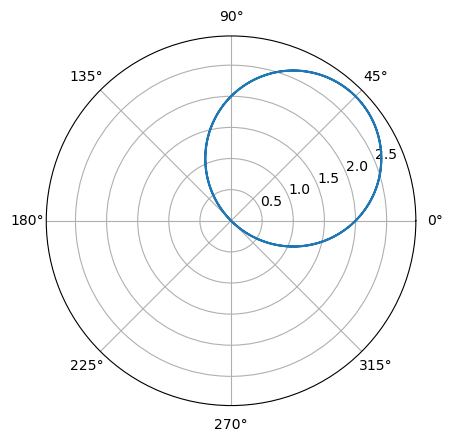

In [48]:
import numpy as np
from matplotlib import pyplot as plt

theta = np.arange(0, 2 * np.pi, .01)[1:]
r = 2 * np.cos(theta) + 2 * np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot(polar=True)

# change negative r values to positive, rotating theta by 180º
theta = np.where(r >= 0, theta, theta + np.pi)
r = np.abs(r)
ax.plot(theta, r)

plt.show()

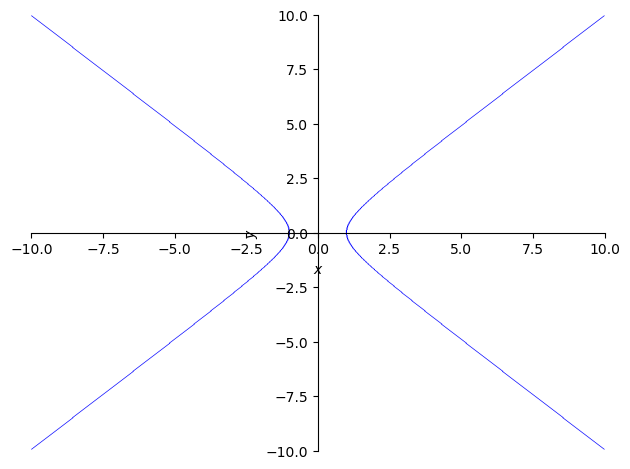

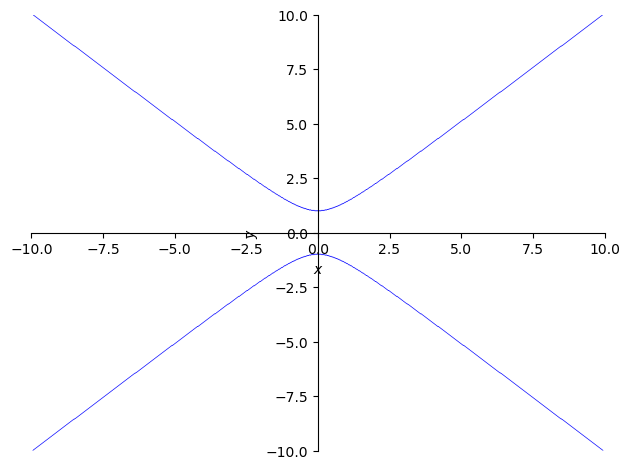

In [55]:
from sympy import plot_implicit, Eq
from sympy.abc import x, y

a = -1
b = 1
plot_implicit(Eq((y - a * x) * (y - b * x), -1), (x, -10, 10), (y, -10, 10))
plot_implicit(Eq((x - a * y) * (x - b * y), -1), (x, -10, 10), (y, -10, 10))

In [71]:
#from sympy import *
from sympy.abc import x
from sympy import roots, solve_poly_system, real_roots

#solve(x**4 + 2*x + 3, x)
cubed = x**3 - 1
real_roots(cubed)

[1]

In [59]:
# + poly[1]x(n-2) + .. + poly[n-1]
def horner(poly, n, x):
    # Initialize result
    result = poly[0]
    # Evaluate value of polynomial
    # using Horner's method
    for i in range(1, n):
        result = result*x + poly[i]
    return result
 
# Let us evaluate value of
# 2x3 - 6x2 + 2x - 1 for x = 3
poly = [2, -6, 2, -1]
x = 3
n = len(poly)
 
print("Value of polynomial is:", horner(poly, n, x))

Value of polynomial is: 5


In [8]:
# hyperbolic transformation
import math
import random
import numpy as np


def findn(x, y):
    return x/y

def transform(x, y):
    n = findn(x, y)
    gamma = 1 / math.sqrt(n*n - x)
    return (n*gamma, x*gamma)

def nearestpoint(x0, y0):
    poly = [1, -x0, (x0*x0-y0*y0-4)/4, x0, -x0*x0/4]
    #x1 = horner(poly, len(poly), 1.5)
    r = np.roots(poly)[0]
    real_valued = r.real[abs(r.imag)<1e-5]
    x1 = real_valued[0]
    return (x1, math.sqrt(x1*x1 - 1))

def dist(p0, p1):
    return math.sqrt((p0[0]-p1[0])**2 + (p0[1]-p1[1])**2)

#p0 = transform(.5, .5)
#p1 = nearestpoint(p0[0], p0[1])
#print(dist(p0, p1))

def newdist(p):
    p0 = transform(p[0], p[1])
    p1 = nearestpoint(p0[0], p0[1])
    return dist(p0, p1)

def newdistnonxform(p):
    p1 = nearestpoint(p[0], p[1])
    return dist(p, p1)

def randpointtriangle():
    x = random.uniform(0, 1)
    return (x, random.uniform(0, x))

def ptsprexform(n):
    return [randpointtriangle() for i in range(n)]

def ptspostxform(pts):
    return [transform(p[0], p[1]) for p in pts]

def countptspre(pts, eps=0.5):
    return sum([1 for p in pts if (1.0 - p[1]) < eps])

def countptspost(pts, eps=0.5):
    return sum([1 for p in pts if newdistnonxform(p) < eps])

#print(newdist((.95, .4)))
#print(randpointtriangle())

pts0 = ptsprexform(10000)
pts1 = ptspostxform(pts0)

print(countptspre(pts0), countptspost(pts1))

1520 378


In [5]:
import imageio.v3 as iio

im = iio.imread(r'man.png')
print(im.shape)

im

(8, 8, 4)


array([[[  0,   0,   0,   0],
        [156,  91,  60, 255],
        [156,  90,  61, 255],
        [156,  90,  61, 255],
        [156,  91,  60, 255],
        [  0,   1,   1,   0],
        [  0,   1,   1,   0],
        [  1,   0,   0,   0]],

       [[  0,   1,   1,   0],
        [157,  90,  60, 255],
        [255, 162, 177, 255],
        [255, 163, 176, 255],
        [255, 163, 177, 255],
        [254, 162, 177, 255],
        [  1,   1,   1,   0],
        [  1,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [157,  91,  60, 255],
        [255, 162, 176, 255],
        [  0,   0,   0, 255],
        [254, 162, 177, 255],
        [  0,   1,   0, 255],
        [  1,   1,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [ 77, 109, 243, 255],
        [254, 162, 177, 255],
        [254, 162, 176, 255],
        [255, 163, 177, 255],
        [254, 162, 176, 255],
        [  0,   0,   1,   0],
        [  1,   1,   0,   0]],

       [[  0,   0,   0,   0],
  

In [7]:
import numpy as np


imarray = []
yclass = []
for i in range(30):
    currentarr = np.random.rand(8, 8)
    if i % 3 == 0:
        np.put(currentarr, [0, 1, 2], [1, 1, 1])
        np.put(currentarr, [8, 9, 10], [1, 0, 1])
        np.put(currentarr, [16, 17, 18], [1, 1, 1])
        yclass.append([0, 1])
    else:
        yclass.append([1, 0])
    imarray.append(currentarr)
    imarray[i] = imarray[i].reshape(64, 1)

imarray[0].shape
#imarray[0]

(64, 1)

In [40]:
# NN maths simple example
import numpy as np


ninputs = 64
noutputs = 2
nhidden0 = 8

ainputs = np.random.random((ninputs, 1))
bhidden0 = np.array((nhidden0, 1))
coutputs = np.array((noutputs, 1))

#winphidden0 = np.zeros((ninputs, nhidden0))
#whidden0out = np.zeros((nhidden0, noutputs))

winphidden0 = np.random.random((ninputs, nhidden0)) / 100
whidden0out = np.random.random((nhidden0, noutputs)) / 100

winphidden0idt = np.identity(nhidden0, like=winphidden0)
whidden0outidt = np.identity(nhidden0, like=whidden0out)

nepochs = 10
etha = 0.05
expert = True

for n in range(nepochs):
    for i in range(len(yclass)):
        # FF
        ainputs = np.array(imarray[i])
        inphidden0 = np.dot(ainputs.T, winphidden0)
        coutputs = np.dot(inphidden0, whidden0out)
        if expert:
            if ainputs[:2].all() == 1 and ainputs[16:18].all() == 1:
                coutputs = np.array([1, 0])
        
        ytruth = np.array(yclass[i])
        dloss = coutputs - ytruth
        loss = np.dot(dloss, dloss.T)
    
        # FB
        # wnew = wold - etha * dE / dwold
        dedw1 = np.dot(whidden0outidt, inphidden0.T) * dloss
        dedw0 = np.dot(dloss, np.dot(winphidden0idt, whidden0out).T) * ainputs
        
        winphidden0 = winphidden0 - etha * dedw0
        whidden0out = whidden0out - etha * dedw1
        
    if n%5 == 0:
        print(loss)
        #etha *= 0.9

# test it
testarr = np.random.rand(8, 8)
np.put(testarr, [0, 1, 2], [1, 1, 1])
np.put(testarr, [8, 9, 10], [1, 0, 1])
np.put(testarr, [16, 17, 18], [1, 1, 1])
testarr = testarr.reshape(64,1)
ainputs = np.array(testarr)
inphidden0 = np.dot(ainputs.T, winphidden0)
coutputs = np.dot(inphidden0, whidden0out)

coutputs

0
0


array([[-1075.60631293,  1078.00018685]])

In [88]:
outputhist = np.array([])

In [113]:
# NN Lottery ticket test
import numpy as np
from matplotlib import pyplot as plt


ninputs = 64
noutputs = 2
nhidden0 = 8

ainputs = np.random.random((ninputs, 1))
bhidden0 = np.array((nhidden0, 1))
coutputs = np.array((noutputs, 1))

#winphidden0 = np.zeros((ninputs, nhidden0))
#whidden0out = np.zeros((nhidden0, noutputs))

winphidden0 = np.random.random((ninputs, nhidden0)) / 100
whidden0out = np.random.random((nhidden0, noutputs)) / 100

winphidden0idt = np.identity(nhidden0, like=winphidden0)
whidden0outidt = np.identity(nhidden0, like=whidden0out)

nepochs = 60
etha = 0.05
expert = True

for n in range(nepochs):
    for i in range(len(yclass)):
        # FF
        ainputs = np.array(imarray[i])
        inphidden0 = np.dot(ainputs.T, winphidden0)
        coutputs = np.dot(inphidden0, whidden0out)
        
        ytruth = np.array(yclass[i])
        dloss = coutputs - ytruth
        loss = np.dot(dloss, dloss.T)
    
        # FB
        # wnew = wold - etha * dE / dwold
        dedw1 = np.dot(whidden0outidt, inphidden0.T) * dloss
        dedw0 = np.dot(dloss, np.dot(winphidden0idt, whidden0out).T) * ainputs
        
        winphidden0 = winphidden0 - etha * dedw0
        whidden0out = whidden0out - etha * dedw1
        
    #if n%5 == 0:
        #print(loss)
        #etha *= 0.9

# prune weights
#outputhist = np.array([])
prunehist = np.array([])
cutoff = 0.

for i in range(50):
    #print((abs(winphidden0) < cutoff).sum() / (64*8))
    prunehist = np.append(prunehist, (abs(winphidden0) < cutoff).sum() / (64*8))
    winphidden0cpy = winphidden0
    winphidden0cpy[abs(winphidden0cpy) < cutoff] = 0
    cutoff += 0.4e-02
    
    # test it - should be [0, 1]
    testarr = np.random.rand(8, 8)
    np.put(testarr, [0, 1, 2], [1, 1, 1])
    np.put(testarr, [8, 9, 10], [1, 0, 1])
    np.put(testarr, [16, 17, 18], [1, 1, 1])
    testarr = testarr.reshape(64,1)
    ainputs = np.array(testarr)
    inphidden0 = np.dot(ainputs.T, winphidden0cpy)
    coutputs = np.dot(inphidden0, whidden0out)
    
    #print(coutputs)
    outputhist = np.append(outputhist, coutputs[0][1])
    #winphidden0
    #outputhist

#plt.plot(outputhist)
#plt.plot(prunehist)
#plt.show()

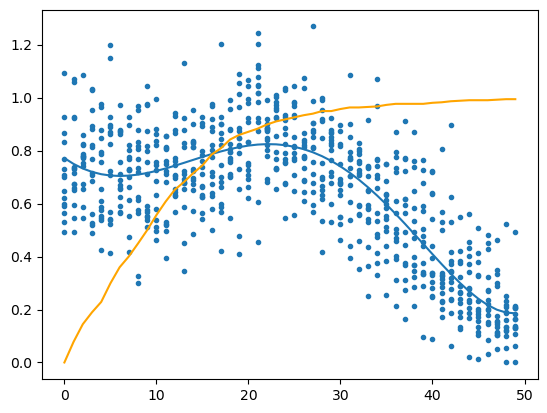

In [114]:
x = [i%50 for i in range(len(outputhist))]
plt.scatter(x, outputhist, marker = '.')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, outputhist, 5))(np.unique(x)))
plt.plot(prunehist, color='orange')
plt.show()